In [1]:
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch

c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# This is a big model, hence we are pulling in the big guns
device = "cuda" if torch.cuda.is_available() else "cpu"

# Instantiate the model
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
).to(device)

preprocessor_config.json: 100%|██████████| 432/432 [00:00<?, ?B/s] 
c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sung2_8l7o06c\.cache\huggingface\hub\models--Salesforce--blip2-opt-2.7b. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [3]:
url = "https://github.com/vis-nlp/ChartQA/blob/main/ChartQA%20Dataset/train/png/00035547003867.png?raw=true"
image = Image.open(requests.get(url, stream=True).raw)

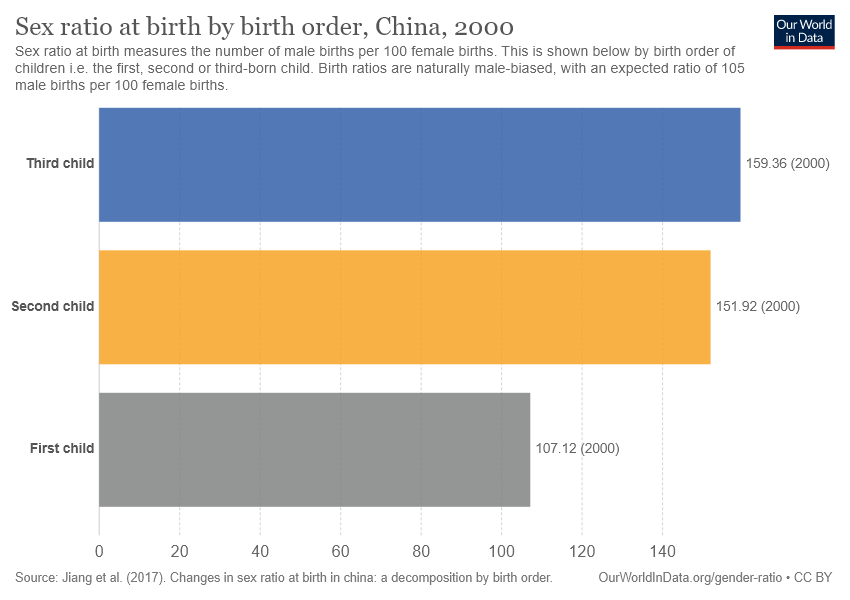

In [4]:
display(image)

In [5]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
generated_ids = model.generate(**inputs)

c:\Users\sung2_8l7o06c\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\generation\utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [6]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True, max_new_tokens = 150)[0].strip()
print(generated_text)

sex rates at birth by country, 2000-2010
